In [1]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns

os.chdir('/Users/ana/Desktop/ta2nise5')

from tokovi_drugic import * 
from helpers import *
from tnsmodule import *


In [2]:
def spectral(omega, k, eta_c, eta_v, eta_vc, m, gap, mu, delta):
    hk = np.array([[-k**2/(2*m) - gap/2, -delta], [-delta, k**2/2 + gap/2]])
    eta = np.array([[eta_v, eta_vc], [-eta_vc, eta_c]]) * 1j
    Gk = LA.inv((omega + mu)*np.eye(2) - hk + eta)
    A = 1/np.pi * Gk.imag
    return A

def colorFader(c1, c2, mix=0.5):
    c1 = np.array(matplotlib.colors.to_rgb(c1))
    c2 = np.array(matplotlib.colors.to_rgb(c2))
    return matplotlib.colors.to_hex((1-mix)*c1 + mix*c2)

In [26]:
dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials = 0.001, 2000, 200, 1e-6, 0.5, 0.001, 1.5, 1e-6, 100
parameters1 = [dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials]

dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials = 0.001, 500, 100, 1e-6, 0.5, 0.001, 1.5, 1e-6, 100
parameters2 = [dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials]


Nk = 150
Ny, Nx = Nk, Nk
mu = 2.84
eps0 = 0.1

n_target = 2.0
s = TNS(a, b, b2, Ny, Nx, U, V, mu, parameters1, parameters2, eps0, n_target)
mu = 0.5*(np.max(s.energije[1]) + np.min(s.energije[2]))
#s = TNS(a, b, b2, Ny, Nx, U, V, mu, parameters1, parameters2, eps0, n_target)

velocity_x, velocity_y = tokovi_drugic.group_velocity(s.kymesh, s.kxmesh, s.energije)


In [27]:
omegas = np.linspace(-0.2,0.2,1001)
DoS = helpers.Density_of_states(s.kymesh, s.kxmesh, s.energije, omegas, s.mu, velocity_x, velocity_y, faktor=1.)


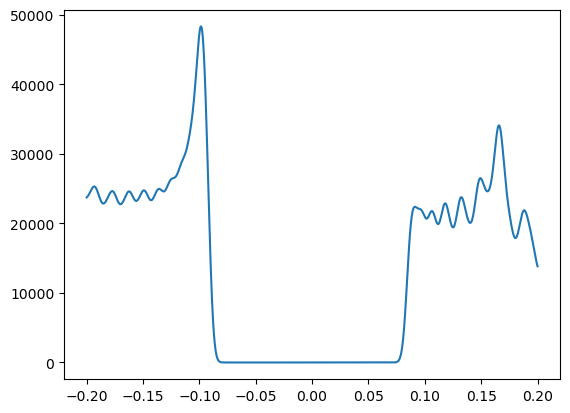

In [28]:
plt.plot(omegas, DoS)


-200.80145228464482
1.5631940186722204e-13
85.96237102629713


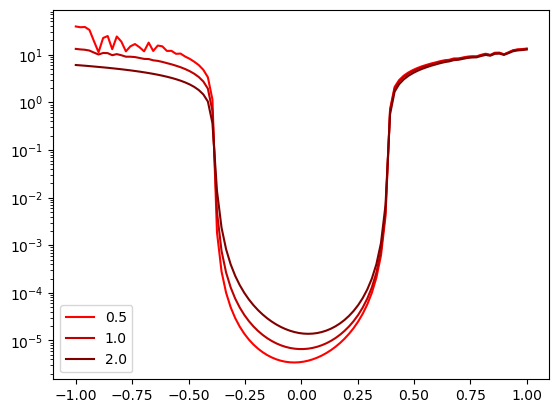

In [809]:
eta_vc = 0.
m = 1.
gap = 0.5
mu = 0

ks = np.linspace(-3,3,1000)
omegas = np.linspace(-1,1,100)


eta_vcs = [0., 0.1, 0.2, 0.4, 0.75]
eta_vc = 0.

delta = 0.3


eta_c = 0.005

faktorji = [0.5, 1., 2.]

for g, faktor in enumerate(faktorji):
    eta_v = eta_c * faktor
    phi = np.zeros(len(omegas))

    for i, k in enumerate(ks):
        v_k = np.array([[-k/m, 0], [0, k]])
        for j, omega in enumerate(omegas):
            A = spectral(omega, k, eta_c, eta_v, eta_vc, m, gap, mu, delta)
            phi[j] += np.trace(v_k @ A @ v_k @ A)
    phi = phi / len(ks)

    plt.plot(omegas, phi, color=colorFader('red', 'black', g/(len(eta_vcs) - 1)), label=faktor)
    print(np.sum(omegas  * phi))
plt.legend()
plt.yscale('log')

In [ ]:
dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials = 0.001, 2000, 200, 1e-6, 0.5, 0.001, 1.5, 1e-6, 100
parameters1 = [dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials]

dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials = 0.001, 500, 100, 1e-6, 0.5, 0.001, 1.5, 1e-6, 100
parameters2 = [dmu, maxiter, maxiter_last, eps_last, mix, mix2, mix3, n_pass, max_trials]


Nk = 50
Ny, Nx = Nk, Nk
mu = 2.84
eps0 = 0.1

n_target = 2.0
s = TNS(a, b, b2, Ny, Nx, U, V, mu, parameters1, parameters2, eps0, n_target)
w15 = s.fock[0,4,:,:]
w25 = s.fock[1,4,:,:]
w36 = s.fock[2,5,:,:]
w46 = s.fock[3,5,:,:]
epsilon_Ta = s.hop[0,0,:,:]
epsilon_Ni = s.hop[4,4,:,:]


In [ ]:
helpers.Delta(s.kxmesh, s.Nk, s.rho, 3, 5, 0)



array([ 0.14766544+6.21724894e-18j, -0.14766544-8.88178420e-20j,
       -0.14766544+8.61533067e-18j,  0.14766544+3.55271368e-18j])

In [593]:
t_Ta = 0.8
t_Ni = 0.3
eps_Ta = 1.35
eps_Ni = 0.3
gap = 0.05

split = (gap - eps_Ta - eps_Ni + 2 * (t_Ta + t_Ni))

epsilon_Ta = -2*t_Ta*np.cos(s.kxmesh*a) + eps_Ta + split / 2 
epsilon_Ni = 2*t_Ni*np.cos(s.kxmesh*a) - eps_Ni - split / 2

w15 = - 0.2 * (np.exp(-1j*s.kxmesh*a) + 0.1)
w25 = - w15

w36 = np.conjugate(w25)
w46 = np.conjugate(w15)

w15 = s.fock[0,4,:,:]
w25 = s.fock[1,4,:,:]
w36 = w25.conj()#s.fock[2,5,:,:]
w46 = w15.conj()#s.fock[3,5,:,:]

#w15 = 0.1 * np.ones((Ny, Nx))
#w25 = - w15 * 2 * np.ones((Ny, Nx))

h0 = np.zeros(s.hop.shape, dtype='complex')
h0[0,0] = epsilon_Ta
h0[1,1] = epsilon_Ta
h0[2,2] = epsilon_Ni
h0[3,3] = epsilon_Ta
h0[4,4] = epsilon_Ta
h0[5,5] = epsilon_Ni
h0[0,2] = w15
h0[1,2] = w25
h0[2,0] = np.conjugate(w15)#.conj()
h0[2,1] = np.conjugate(w25)#.conj()
h0[3,5] = w36#.conj()
h0[4,5] = w46#.conj()
h0[5,3] = np.conjugate(w36)#.conj()
h0[5,4] = np.conjugate(w46)#.conj()


hA = h0[:3,:3,:,:]
hB = h0[3:,3:,:,:]

''' diagonalize hA '''

hA_energije, hA_vecs = np.zeros((3, Ny, Nx)), np.zeros((3, 3, Ny, Nx), dtype=np.complex128)
for m in range(Ny):
    for n in range(Nx):
        en, v = LA.eigh(hA[:,:,m,n])
        hA_energije[:,m,n] = en
        hA_vecs[:,:,m,n] = v

''' diagonalize hB '''
hB_energije, hB_vecs = np.zeros((3, Ny, Nx)), np.zeros((3, 3, Ny, Nx), dtype=np.complex128)
for m in range(Ny):
    for n in range(Nx):
        en, v = LA.eigh(hB[:,:,m,n])
        hB_energije[:,m,n] = en
        hB_vecs[:,:,m,n] = v

''' I find that hA_energije = hB_energije but hA_vecs != hB_vecs '''

''' form total energije and vecs matrices from sectors A and B, order them in such a way that degenerate states are together '''
hAB_energije, hAB_vecs = np.zeros((6, Ny, Nx)), np.zeros((6, 6, Ny, Nx), dtype=np.complex128)
hAB_energije[0] = hA_energije[0]
for j in range(3):
    hAB_energije[2*j] = hA_energije[j]
    hAB_energije[2*j+1] = hB_energije[j]
    hAB_vecs[:3, 2*j] = hA_vecs[:,j]
    hAB_vecs[3:, 2*j+1] = hB_vecs[:,j]

''' now add the off-diagonal hopping as a perturbation '''
h1, lambd = H_1(s.kymesh, s.kxmesh, a, b, )

''' get corrections in 1st degenerate subspace '''
energije1, vecs1 = np.zeros((2, Ny, Nx)), np.zeros((6, 2, Ny, Nx), dtype=np.complex128)
v1 = hAB_vecs[:,0,:,:]
v1_ = hAB_vecs[:,1,:,:]
for m in range(Ny):
    for n in range(Nx):
        v1k = v1[:,m,n]
        v1k_ = v1_[:,m,n]
        h1k = h1[:,:,m,n]

        element11 = np.dot(v1k.conj().T, (h1k @ v1k))
        element12 = np.dot(v1k.conj().T, (h1k @ v1k_))
        element22 = np.dot(v1k_.conj().T, (h1k @ v1k_))
        element21 = element12.conj()
        h1_matrix = np.array([[element11, element12], [element21, element22]])
        en, v = LA.eigh(h1_matrix)
        energije1[:,m,n] = en
        vec1 = v[0,0] * v1k + v[1,0] * v1k_
        vec2 = v[0,1] * v1k + v[1,1] * v1k_
        vecs1[:,0,m,n] = vec1
        vecs1[:,1,m,n] = vec2

''' get corrections in 2nd degenerate subspace '''
energije2, vecs2 = np.zeros((2, Ny, Nx)), np.zeros((6, 2, Ny, Nx), dtype=np.complex128)
v2 = hAB_vecs[:,2,:,:]
v2_ = hAB_vecs[:,3,:,:]
for m in range(Ny):
    for n in range(Nx):
        v2k = v2[:,m,n]
        v2k_ = v2_[:,m,n]
        h2k = h1[:,:,m,n]

        h1_matrix = np.zeros((2,2), dtype=np.complex128)
        element11 = np.dot(v2k.conj().T, (h2k @ v2k))
        element12 = np.dot(v2k.conj().T, (h2k @ v2k_))
        element22 = np.dot(v2k_.conj().T, (h2k @ v2k_))
        element21 = element12.conj()
        h1_matrix = np.array([[element11, element12], [element21, element22]])
        en, v = LA.eigh(h1_matrix)
        energije2[:,m,n] = en
        vec1 = v[0,0] * v2k + v[1,0] * v2k_
        vec2 = v[0,1] * v2k + v[1,1] * v2k_
        vecs2[:,0,m,n] = vec1
        vecs2[:,1,m,n] = vec2

''' get corrections in 3rd degenerate subspace '''
energije3, vecs3 = np.zeros((2, Ny, Nx)), np.zeros((6, 2, Ny, Nx), dtype=np.complex128)
v3 = hAB_vecs[:,4,:,:]
v3_ = hAB_vecs[:,5,:,:]
for m in range(Ny):
    for n in range(Nx):
        v3k = v3[:,m,n]
        v3k_ = v3_[:,m,n]
        h3k = h1[:,:,m,n]

        h1_matrix = np.zeros((2,2), dtype=np.complex128)
        element11 = np.dot(v3k.conj().T, (h3k @ v3k))
        element12 = np.dot(v3k.conj().T, (h3k @ v3k_))
        element22 = np.dot(v3k_.conj().T, (h3k @ v3k_))
        element21 = element12.conj()
        h1_matrix = np.array([[element11, element12], [element21, element22]])
        en, v = LA.eigh(h1_matrix)
        energije3[:,m,n] = en
        vec1 = v[0,0] * v3k + v[1,0] * v3k_
        vec2 = v[0,1] * v3k + v[1,1] * v3k_
        vecs3[:,0,m,n] = vec1
        vecs3[:,1,m,n] = vec2

energije_correction = np.zeros((6, Ny, Nx))
energije_correction[:2,:,:] = energije1
energije_correction[2:4,:,:] = energije2
energije_correction[4:,:,:] = energije3


''' get corrections for 1st deg subspace'''

energije1_2 = np.zeros((2, Ny, Nx))
vectors1_2 = np.zeros((6, 2, Ny, Nx), dtype=np.complex128)
for m in range(Ny):
    for n in range(Nx):
        
        # k = 1
        for alpha in [0,1]:
            # k=1, alpha=1
            energija_1 = hAB_energije[0,m,n]
            v1 = vecs1[:,alpha,m,n]

            # get contributions from l=2
            energija_2 = hAB_energije[2,m,n]
            
            vec21 = hAB_vecs[:,2,m,n] #l=2,j=1
            vec22 = hAB_vecs[:,3,m,n] #l=2,j=2

            u = np.dot(vec21.conj().T, h1[:,:,m,n] @ v1)
            energije1_2[alpha,m,n] += np.abs(u)**2 / (energija_1 - energija_2)
            vectors1_2[:,alpha,m,n] += u / (energija_1 - energija_2) * vec21
            
            u = np.dot(vec22.conj().T, h1[:,:,m,n] @ v1)
            energije1_2[alpha,m,n] += np.abs(u)**2 / (energija_1 - energija_2)
            vectors1_2[:,alpha,m,n] += u / (energija_1 - energija_2) * vec22
            
            
            # get contributions from l=3
            energija_3 = hAB_energije[4,m,n]
            
            vec21 = hAB_vecs[:,4,m,n] #l=2,j=1
            vec22 = hAB_vecs[:,5,m,n] #l=2,j=2

            u = np.dot(vec21.conj().T, h1[:,:,m,n] @ v1)
            energije1_2[alpha,m,n] += np.abs(u)**2 / (energija_1 - energija_3)
            vectors1_2[:,alpha,m,n] += u / (energija_1 - energija_3) * vec21
            
            u = np.dot(vec22.conj().T, h1[:,:,m,n] @ v1)
            energije1_2[alpha,m,n] += np.abs(u)**2 / (energija_1 - energija_3)
            vectors1_2[:,alpha,m,n] += u / (energija_1 - energija_3) * vec22

    
energije2_2 = np.zeros((2, Ny, Nx))
vectors2_2 = np.zeros((6, 2, Ny, Nx), dtype=np.complex128)
for m in range(Ny):
    for n in range(Nx):
        
        for alpha in [0,1]:
            # k=1, alpha=1
            energija_2 = hAB_energije[2,m,n]
            v2 = vecs2[:,alpha,m,n]

            # get contributions from l=1
            energija_1 = hAB_energije[0,m,n]
            
            vec21 = hAB_vecs[:,0,m,n] #l=1,j=1
            vec22 = hAB_vecs[:,1,m,n] #l=1,j=2

            u = np.dot(vec21.conj().T, h1[:,:,m,n] @ v2)
            energije2_2[alpha,m,n] += np.abs(u)**2 / (energija_2 - energija_1)
            vectors2_2[:,alpha,m,n] += u / (energija_2 - energija_1) * vec21
            
            u = np.dot(vec22.conj().T, h1[:,:,m,n] @ v2)
            energije2_2[alpha,m,n] += np.abs(u)**2 / (energija_2 - energija_1)
            vectors2_2[:,alpha,m,n] += u / (energija_2 - energija_1) * vec22
            
            
            # get contributions from l=3
            energija_3 = hAB_energije[4,m,n]
            
            vec21 = hAB_vecs[:,4,m,n] #l=2,j=1
            vec22 = hAB_vecs[:,5,m,n] #l=2,j=2

            u = np.dot(vec21.conj().T, h1[:,:,m,n] @ v2)
            energije2_2[alpha,m,n] += np.abs(u)**2 / (energija_2 - energija_3)
            vectors2_2[:,alpha,m,n] += u / (energija_2 - energija_3) * vec21
            
            u = np.dot(vec22.conj().T, h1[:,:,m,n] @ v2)
            energije2_2[alpha,m,n] += np.abs(u)**2 / (energija_2 - energija_3)
            vectors2_2[:,alpha,m,n] += u / (energija_2 - energija_3) * vec22

energije3_2 = np.zeros((2, Ny, Nx))
vectors3_2 = np.zeros((6, 2, Ny, Nx), dtype=np.complex128)
for m in range(Ny):
    for n in range(Nx):
        
        # k = 2
        for alpha in [0,1]:
            # k=1, alpha=1
            energija_3 = hAB_energije[4,m,n]
            v3 = vecs3[:,alpha,m,n]

            # get contributions from l=1
            energija_1 = hAB_energije[0,m,n]
            
            vec21 = hAB_vecs[:,0,m,n] #l=1,j=1
            vec22 = hAB_vecs[:,1,m,n] #l=1,j=2

            u = np.dot(vec21.conj().T, h1[:,:,m,n] @ v3)
            energije3_2[alpha,m,n] += np.abs(u)**2 / (energija_3 - energija_1)
            vectors3_2[:,alpha,m,n] += u / (energija_3 - energija_1) * vec21
            
            u = np.dot(vec22.conj().T, h1[:,:,m,n] @ v3)
            energije3_2[alpha,m,n] += np.abs(u)**2 / (energija_3 - energija_1)
            vectors3_2[:,alpha,m,n] += u / (energija_3 - energija_1) * vec22
            
            
            # get contributions from l=2
            energija_2 = hAB_energije[2,m,n]
            
            vec21 = hAB_vecs[:,4,m,n] #l=2,j=1
            vec22 = hAB_vecs[:,5,m,n] #l=2,j=2

            u = np.dot(vec21.conj().T, h1[:,:,m,n] @ v3)
            energije3_2[alpha,m,n] += np.abs(u)**2 / (energija_3 - energija_2)
            vectors3_2[:,alpha,m,n] += u / (energija_3 - energija_2) * vec21
            
            u = np.dot(vec22.conj().T, h1[:,:,m,n] @ v3)
            energije3_2[alpha,m,n] += np.abs(u)**2 / (energija_3 - energija_2)
            vectors3_2[:,alpha,m,n] += u / (energija_3 - energija_2) * vec22

energije_correction2 = np.zeros((6, Ny, Nx))
energije_correction2[:2,:,:] = energije1_2
energije_correction2[2:4,:,:] = energije2_2
energije_correction2[4:,:,:] = energije3_2

In [594]:
lambd = max_tij * 1.
energije_total = hAB_energije + lambd * energije_correction + lambd**2 * energije_correction2


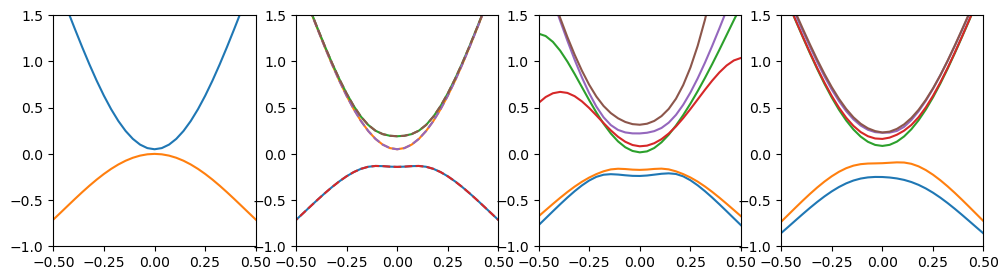

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(12,3))
ax[0].plot(s.kxmesh[0], h0[0,0,0].real)
ax[0].plot(s.kxmesh[0], h0[2,2,0].real)

ax[1].plot(s.kxmesh[0], hA_energije[0,0].real)
ax[1].plot(s.kxmesh[0], hA_energije[1,0].real)
ax[1].plot(s.kxmesh[0], hA_energije[2,0].real)

ax[1].plot(s.kxmesh[0], hB_energije[0,0].real, ls='dashed')
ax[1].plot(s.kxmesh[0], hB_energije[1,0].real, ls='dashed')
ax[1].plot(s.kxmesh[0], hB_energije[2,0].real, ls='dashed')

flat_index = np.argmax(s.energije[1])

# Convert to row, column index
i,j = np.unravel_index(flat_index, s.energije[1].shape)
for j in range(6):
    ax[2].plot(s.kxmesh[0], energije_total[j,i])


for j in range(6):
    ax[3].plot(s.kxmesh[0], s.energije[j,i] - 2.84)
for j in range(4):
    ax[j].set_ylim(-1.,1.5)
for j in range(4):
    ax[j].set_xlim(-0.5,0.5)



In [787]:
t_Ta = 0.72
t_Ni = 0.3
eps_Ta = 1.35
eps_Ni = 0.3
gap = -0.1

split = (gap - eps_Ta - eps_Ni + 2 * (t_Ta + t_Ni))

epsilon_Ta = -2*t_Ta*np.cos(s.kxmesh*a) + eps_Ta + split / 2 
epsilon_Ni = 2*t_Ni*np.cos(s.kxmesh*a) - eps_Ni - split / 2

w15 = - 0.15 * (np.exp(-1j*s.kxmesh*a) + 0.1)
w25 = - w15

w36 = np.conjugate(w25)
w46 = np.conjugate(w15)

#w15 = s.fock[0,4,:,:]
#w25 = s.fock[1,4,:,:]
#w36 = w25.conj()#s.fock[2,5,:,:]
#w46 = w15.conj()#s.fock[3,5,:,:]

delta = np.sqrt(np.abs(w15)**2 + np.abs(w25)**2)
delta_mean = np.mean(delta)
#w15 = s.fock[0,4,:,:]
#w25 = s.fock[1,4,:,:]
#w36 = w25.conj()#s.fock[2,5,:,:]
#w46 = w15.conj()#s.fock[3,5,:,:]

#w15 = 0.1 * np.ones((Ny, Nx))
#w25 = - w15 * 2 * np.ones((Ny, Nx))

h0 = np.zeros(s.hop.shape, dtype='complex')
h0[0,0] = epsilon_Ta
h0[1,1] = epsilon_Ta
h0[2,2] = epsilon_Ni
h0[3,3] = epsilon_Ta
h0[4,4] = epsilon_Ta
h0[5,5] = epsilon_Ni
h0[0,2] = w15
h0[1,2] = w25
h0[2,0] = np.conjugate(w15)#.conj()
h0[2,1] = np.conjugate(w25)#.conj()
h0[3,5] = w36#.conj()
h0[4,5] = w46#.conj()
h0[5,3] = np.conjugate(w36)#.conj()
h0[5,4] = np.conjugate(w46)#.conj()


hA = h0[:3,:3,:,:]
hB = h0[3:,3:,:,:]

''' diagonalize hA '''

hA_energije, hA_vecs = np.zeros((3, Ny, Nx)), np.zeros((3, 3, Ny, Nx), dtype=np.complex128)
for m in range(Ny):
    for n in range(Nx):
        en, v = LA.eigh(hA[:,:,m,n])
        hA_energije[:,m,n] = en
        hA_vecs[:,:,m,n] = v

''' diagonalize hB '''
hB_energije, hB_vecs = np.zeros((3, Ny, Nx)), np.zeros((3, 3, Ny, Nx), dtype=np.complex128)
for m in range(Ny):
    for n in range(Nx):
        en, v = LA.eigh(hB[:,:,m,n])
        hB_energije[:,m,n] = en
        hB_vecs[:,:,m,n] = v

''' I find that hA_energije = hB_energije but hA_vecs != hB_vecs '''

''' form total energije and vecs matrices from sectors A and B, order them in such a way that degenerate states are together '''
hAB_energije, hAB_vecs = np.zeros((6, Ny, Nx)), np.zeros((6, 6, Ny, Nx), dtype=np.complex128)
hAB_energije[0] = hA_energije[0]
for j in range(3):
    hAB_energije[2*j] = hA_energije[j]
    hAB_energije[2*j+1] = hB_energije[j]
    hAB_vecs[:3, 2*j] = hA_vecs[:,j]
    hAB_vecs[3:, 2*j+1] = hB_vecs[:,j]


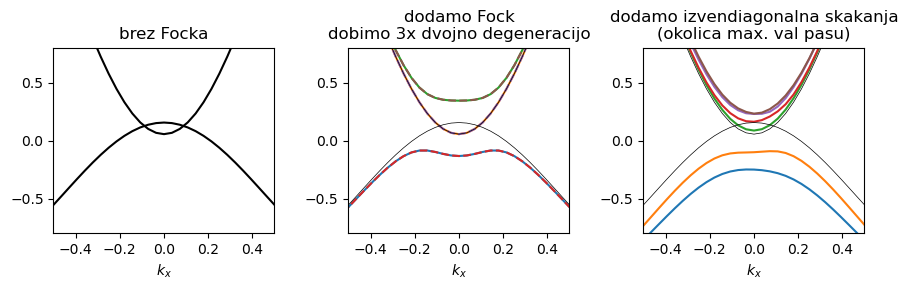

In [790]:
fig, ax = plt.subplots(ncols=3, figsize=(9,3))
ax[0].plot(s.kxmesh[0], h0[0,0,0].real, color='black')
ax[0].plot(s.kxmesh[0], h0[2,2,0].real, color='black')

ax[1].plot(s.kxmesh[0], hA_energije[0,0].real)
ax[1].plot(s.kxmesh[0], hA_energije[1,0].real)
ax[1].plot(s.kxmesh[0], hA_energije[2,0].real)

ax[1].plot(s.kxmesh[0], hB_energije[0,0].real, ls='dashed')
ax[1].plot(s.kxmesh[0], hB_energije[1,0].real, ls='dashed')
ax[1].plot(s.kxmesh[0], hB_energije[2,0].real, ls='dashed')

flat_index = np.argmax(s.energije[1])

# Convert to row, column index
i,j = np.unravel_index(flat_index, s.energije[1].shape)
for j in range(6):
    ax[2].plot(s.kxmesh[0], s.energije[j,i] - s.mu)
for j in range(3):
    ax[j].set_ylim(-0.8,0.8)
    ax[j].set_xlabel(r'$k_x$')
for j in range(3):
    ax[j].set_xlim(-0.5,0.5)
ax[0].set_title(r'brez Focka' )

for j in range(1,3):
    ax[j].plot(s.kxmesh[0], h0[0,0,0].real, color='black', lw=0.5)
    ax[j].plot(s.kxmesh[0], h0[2,2,0].real, color='black', lw=0.5)

ax[1].set_title(r'dodamo Fock'+ '\n' + 'dobimo 3x dvojno degeneracijo')
ax[2].set_title(r'dodamo izvendiagonalna skakanja' + '\n' + '(okolica max. val pasu)')

plt.tight_layout()
os.chdir('/Users/ana/Desktop/')
plt.savefig('disperzije.pdf', bbox_inches='tight')

<Axes: >

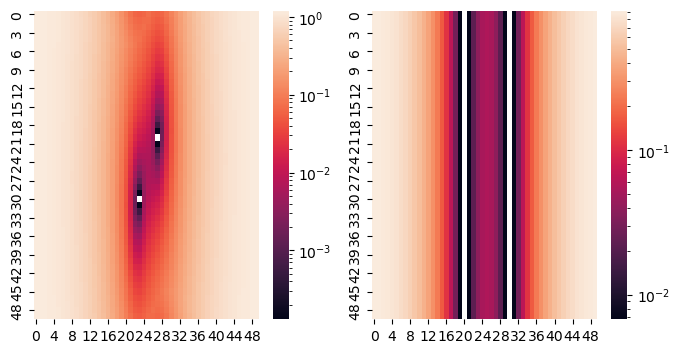

In [763]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
sns.heatmap(np.abs(s.energije[1] - np.max(s.energije[1])), ax=ax[0], norm=matplotlib.colors.LogNorm())
sns.heatmap(np.abs(hA_energije[0] - np.max(hA_energije[0])), ax=ax[1], norm=matplotlib.colors.LogNorm())


<function matplotlib.pyplot.show(close=None, block=None)>

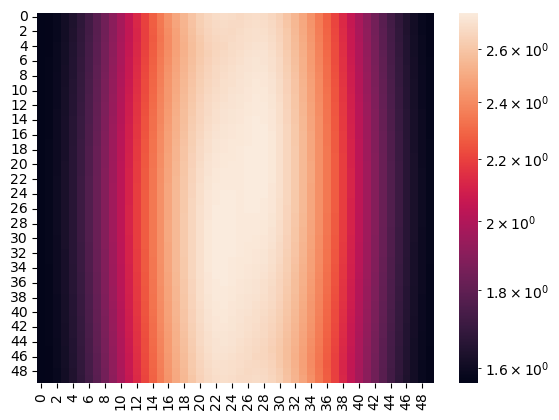

In [756]:
sns.heatmap(s.energije[1], norm=matplotlib.colors.LogNorm())
plt.show

In [ ]:

hA = h0[:3,:3,:,:]
hB = h0[3:,3:,:,:]

''' diagonalize hA '''

hA_energije, hA_vecs = np.zeros((3, Ny, Nx)), np.zeros((3, 3, Ny, Nx), dtype=np.complex128)
for m in range(Ny):
    for n in range(Nx):
        en, v = LA.eigh(hA[:,:,m,n])
        hA_energije[:,m,n] = en
        hA_vecs[:,:,m,n] = v

''' diagonalize hB '''
hB_energije, hB_vecs = np.zeros((3, Ny, Nx)), np.zeros((3, 3, Ny, Nx), dtype=np.complex128)
for m in range(Ny):
    for n in range(Nx):
        en, v = LA.eigh(hB[:,:,m,n])
        hB_energije[:,m,n] = en
        hB_vecs[:,:,m,n] = v

''' I find that hA_energije = hB_energije but hA_vecs != hB_vecs '''

''' form total energije and vecs matrices from sectors A and B, order them in such a way that degenerate states are together '''
hAB_energije, hAB_vecs = np.zeros((6, Ny, Nx)), np.zeros((6, 6, Ny, Nx), dtype=np.complex128)
hAB_energije[0] = hA_energije[0]
for j in range(3):
    hAB_energije[2*j] = hA_energije[j]
    hAB_energije[2*j+1] = hB_energije[j]
    hAB_vecs[:3, 2*j] = hA_vecs[:,j]
    hAB_vecs[3:, 2*j+1] = hB_vecs[:,j]

''' now add the off-diagonal hopping as a perturbation '''
h1, lambd = H_1(s.kymesh, s.kxmesh, a, b, )

''' get corrections in 1st degenerate subspace '''
energije1, vecs1 = np.zeros((2, Ny, Nx)), np.zeros((6, 2, Ny, Nx), dtype=np.complex128)
v1 = hAB_vecs[:,0,:,:]
v1_ = hAB_vecs[:,1,:,:]
for m in range(Ny):
    for n in range(Nx):
        v1k = v1[:,m,n]
        v1k_ = v1_[:,m,n]
        h1k = h1[:,:,m,n]

        element11 = np.dot(v1k.conj().T, (h1k @ v1k))
        element12 = np.dot(v1k.conj().T, (h1k @ v1k_))
        element22 = np.dot(v1k_.conj().T, (h1k @ v1k_))
        element21 = element12.conj()
        h1_matrix = np.array([[element11, element12], [element21, element22]])
        en, v = LA.eigh(h1_matrix)
        energije1[:,m,n] = en
        vec1 = v[0,0] * v1k + v[0,1] * v1k_
        vec2 = v[1,0] * v1k + v[1,1] * v1k_
        vecs1[:,0,m,n] = vec1
        vecs1[:,1,m,n] = vec2

''' get corrections in 1st degenerate subspace '''
energije2, vecs2 = np.zeros((2, Ny, Nx)), np.zeros((6, 2, Ny, Nx), dtype=np.complex128)
v2 = hAB_vecs[:,2,:,:]
v2_ = hAB_vecs[:,3,:,:]
for m in range(Ny):
    for n in range(Nx):
        v2k = v2[:,m,n]
        v2k_ = v1_[:,m,n]
        h2k = h1[:,:,m,n]

        h1_matrix = np.zeros((2,2), dtype=np.complex128)
        element11 = np.dot(v2k.conj().T, (h1k @ v2k))
        element12 = np.dot(v2k.conj().T, (h1k @ v2k_))
        element22 = np.dot(v2k_.conj().T, (h1k @ v2k_))
        element21 = element12.conj()
        h1_matrix = np.array([[element11, element12], [element21, element22]])
        en, v = LA.eigh(h1_matrix)
        energije2[:,m,n] = en
        vec1 = v[0,0] * v2k + v[0,1] * v2k_
        vec2 = v[1,0] * v2k + v[1,1] * v2k_
        vecs2[:,0,m,n] = vec1
        vecs2[:,1,m,n] = vec2

''' get corrections in 1st degenerate subspace '''
energije3, vecs3 = np.zeros((2, Ny, Nx)), np.zeros((6, 2, Ny, Nx), dtype=np.complex128)
v3 = hAB_vecs[:,4,:,:]
v3_ = hAB_vecs[:,5,:,:]
for m in range(Ny):
    for n in range(Nx):
        v3k = v2[:,m,n]
        v3k_ = v1_[:,m,n]
        h3k = h1[:,:,m,n]

        h1_matrix = np.zeros((2,2), dtype=np.complex128)
        element11 = np.dot(v3k.conj().T, (h1k @ v3k))
        element12 = np.dot(v3k.conj().T, (h1k @ v3k_))
        element22 = np.dot(v3k_.conj().T, (h1k @ v3k_))
        element21 = element12.conj()
        h1_matrix = np.array([[element11, element12], [element21, element22]])
        en, v = LA.eigh(h1_matrix)
        energije3[:,m,n] = en
        vec1 = v[0,0] * v3k + v[0,1] * v3k_
        vec2 = v[1,0] * v3k + v[1,1] * v3k_
        vecs3[:,0,m,n] = vec1
        vecs3[:,1,m,n] = vec2

energije_correction = np.zeros((6, Ny, Nx))
vecs_total = np.zeros((6, 6, Ny, Nx), dtype='complex')
energije_correction[:2,:,:] = energije1
energije_correction[2:4,:,:] = energije2
energije_correction[4:,:,:] = energije3
energije_total = hAB_energije + lambd * energije_correction
vecs_total[:,:2,:,:] = vecs1
vecs_total[:,2:4,:,:] = vecs2
vecs_total[:,4:6,:,:] = vecs3

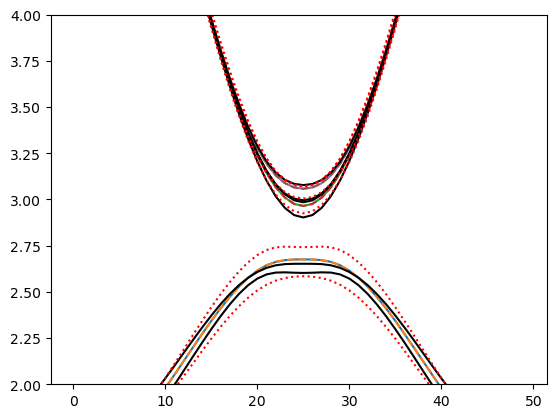

In [182]:
plt.plot(hAB_energije[0,Ny//2].real)
plt.plot(hAB_energije[1,Ny//2].real, ls='dashed')
plt.plot(hAB_energije[2,Ny//2].real)
plt.plot(hAB_energije[3,Ny//2].real, ls='dashed')
plt.plot(hAB_energije[4,Ny//2].real)
plt.plot(hAB_energije[5,Ny//2].real, ls='dashed')

plt.ylim(2,4)

plt.plot(energije_total[0,Ny//2], color='black')
plt.plot(energije_total[1,Ny//2], color='black')
plt.plot(energije_total[2,Ny//2], color='black')
plt.plot(energije_total[3,Ny//2], color='black')
plt.plot(energije_total[4,Ny//2], color='black')
plt.plot(energije_total[5,Ny//2], color='black')

plt.plot(s.energije[0,Ny//2], color='red', ls='dotted')
plt.plot(s.energije[1,Ny//2], color='red', ls='dotted')
plt.plot(s.energije[2,Ny//2], color='red', ls='dotted')
plt.plot(s.energije[3,Ny//2], color='red', ls='dotted')
plt.plot(s.energije[4,Ny//2], color='red', ls='dotted')
plt.plot(s.energije[5,Ny//2], color='red', ls='dotted')

In [98]:
np.allclose(hB_vecs, hA_vecs)

False

array([[ 2.51498447+0.j        ,  0.        +0.j        ,
         0.03704655-0.02562651j],
       [ 0.        +0.j        ,  2.51498447+0.j        ,
         0.0149084 +0.0425077j ],
       [ 0.03704655+0.02562651j,  0.0149084 -0.0425077j ,
        -0.8454102 +0.j        ]])

0.34085070410711654
0.34345355374415104
0.32666932587733083


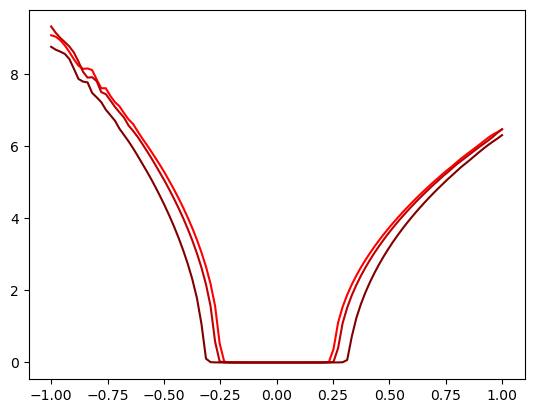

In [90]:
eta_c, eta_v = 0.01, 0.01
m = 0.5
gap = 0.5
mu = 0

ks = np.linspace(-3,3,1000)
omegas = np.linspace(-1,1,100)


eta_vcs = [0., 0.1, 0.2, 0.4, 0.75]
eta_vc = 0.

deltas = [0., 0.1, 0.2]
for n, delta in enumerate(deltas):

    v_k = np.array([[-k/m, 0], [0, k]])

    phi = np.zeros(len(omegas))

    for i, k in enumerate(ks):
        v_k = np.array([[-k/m, 0], [0, k]])
        for j, omega in enumerate(omegas):
            A = spectral(omega, k, eta_c, eta_v, eta_vc, m, gap, mu, delta)
            phi[j] += np.trace(v_k @ A @ v_k @ A)
    phi = phi / len(ks)

    plt.plot(omegas, phi, color=colorFader('red', 'black', n/(len(eta_vcs) - 1)))

    asimetrija = np.sum(np.abs(phi - phi[::-1])/np.sum(phi))
    print(asimetrija)